In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r Australia_2018

In [5]:
Australia_2018

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
7,7,AC Agar (AUS),5,5,0,130,46,26.00,144,90.27,...,232,4,2/48,58.00,5.52,63.0,0,0,2,0
46,46,AT Carey (AUS),6,6,0,199,47,33.16,253,78.65,...,-,-,-,-,-,-,-,-,5,0
64,64,NM Coulter-Nile (AUS),1,1,0,34,34,34.00,31,109.67,...,26,1,1/26,26.00,8.66,18.0,0,0,0,0
67,67,PJ Cummins (AUS),6,6,2,38,12,9.50,67,56.71,...,266,8,4/24,33.25,4.75,42.0,1,0,0,0
99,99,AJ Finch (AUS),11,11,0,493,107,44.81,551,89.47,...,24,0,-,-,6.00,-,0,0,5,0
111,111,JR Hazlewood (AUS),6,4,4,16,10*,-,24,66.66,...,284,8,3/39,35.50,4.98,42.7,0,0,3,0
113,113,TM Head (AUS),12,12,0,339,96,28.25,364,93.13,...,70,0,-,-,7.11,-,0,0,2,0
157,157,CA Lynn (AUS),3,3,0,59,44,19.66,77,76.62,...,-,-,-,-,-,-,-,-,3,0
158,158,NM Lyon (AUS),2,2,1,4,3*,4.00,13,30.76,...,70,1,1/38,70.00,4.11,102.0,0,0,1,0
168,168,MR Marsh (AUS),5,5,0,186,55,37.20,218,85.32,...,81,3,2/24,27.00,4.50,36.0,0,0,2,0


In [6]:
Australia_2018=Australia_2018.reset_index()

In [7]:
Australia_2018

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,7,7,AC Agar (AUS),5,5,0,130,46,26.00,144,...,232,4,2/48,58.00,5.52,63.0,0,0,2,0
1,46,46,AT Carey (AUS),6,6,0,199,47,33.16,253,...,-,-,-,-,-,-,-,-,5,0
2,64,64,NM Coulter-Nile (AUS),1,1,0,34,34,34.00,31,...,26,1,1/26,26.00,8.66,18.0,0,0,0,0
3,67,67,PJ Cummins (AUS),6,6,2,38,12,9.50,67,...,266,8,4/24,33.25,4.75,42.0,1,0,0,0
4,99,99,AJ Finch (AUS),11,11,0,493,107,44.81,551,...,24,0,-,-,6.00,-,0,0,5,0
5,111,111,JR Hazlewood (AUS),6,4,4,16,10*,-,24,...,284,8,3/39,35.50,4.98,42.7,0,0,3,0
6,113,113,TM Head (AUS),12,12,0,339,96,28.25,364,...,70,0,-,-,7.11,-,0,0,2,0
7,157,157,CA Lynn (AUS),3,3,0,59,44,19.66,77,...,-,-,-,-,-,-,-,-,3,0
8,158,158,NM Lyon (AUS),2,2,1,4,3*,4.00,13,...,70,1,1/38,70.00,4.11,102.0,0,0,1,0
9,168,168,MR Marsh (AUS),5,5,0,186,55,37.20,218,...,81,3,2/24,27.00,4.50,36.0,0,0,2,0


In [8]:
Australia_2018.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
Australia_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,AC Agar (AUS),5,5,0,130,46,26.00,144,90.27,0,...,232,4,2/48,58.00,5.52,63.0,0,0,2,0
1,AT Carey (AUS),6,6,0,199,47,33.16,253,78.65,0,...,-,-,-,-,-,-,-,-,5,0
2,NM Coulter-Nile (AUS),1,1,0,34,34,34.00,31,109.67,0,...,26,1,1/26,26.00,8.66,18.0,0,0,0,0
3,PJ Cummins (AUS),6,6,2,38,12,9.50,67,56.71,0,...,266,8,4/24,33.25,4.75,42.0,1,0,0,0
4,AJ Finch (AUS),11,11,0,493,107,44.81,551,89.47,3,...,24,0,-,-,6.00,-,0,0,5,0
5,JR Hazlewood (AUS),6,4,4,16,10*,-,24,66.66,0,...,284,8,3/39,35.50,4.98,42.7,0,0,3,0
6,TM Head (AUS),12,12,0,339,96,28.25,364,93.13,0,...,70,0,-,-,7.11,-,0,0,2,0
7,CA Lynn (AUS),3,3,0,59,44,19.66,77,76.62,0,...,-,-,-,-,-,-,-,-,3,0
8,NM Lyon (AUS),2,2,1,4,3*,4.00,13,30.76,0,...,70,1,1/38,70.00,4.11,102.0,0,0,1,0
9,MR Marsh (AUS),5,5,0,186,55,37.20,218,85.32,0,...,81,3,2/24,27.00,4.50,36.0,0,0,2,0


In [10]:
Australia_2018_players =Australia_2018.copy()

In [11]:
Australia_2018_players.drop('Player',axis=1,inplace=True)

In [12]:
Australia_2018_players.HS=Australia_2018_players.HS.str.extract('(\d+)')
Australia_2018_players['HS'].fillna(value=0, inplace=True)


In [13]:
Australia_2018_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,5,5,0,130,46,26.00,144,90.27,0,0,...,232,4,2/48,58.00,5.52,63.0,0,0,2,0
1,6,6,0,199,47,33.16,253,78.65,0,0,...,-,-,-,-,-,-,-,-,5,0
2,1,1,0,34,34,34.00,31,109.67,0,0,...,26,1,1/26,26.00,8.66,18.0,0,0,0,0
3,6,6,2,38,12,9.50,67,56.71,0,0,...,266,8,4/24,33.25,4.75,42.0,1,0,0,0
4,11,11,0,493,107,44.81,551,89.47,3,1,...,24,0,-,-,6.00,-,0,0,5,0
5,6,4,4,16,10,-,24,66.66,0,0,...,284,8,3/39,35.50,4.98,42.7,0,0,3,0
6,12,12,0,339,96,28.25,364,93.13,0,4,...,70,0,-,-,7.11,-,0,0,2,0
7,3,3,0,59,44,19.66,77,76.62,0,0,...,-,-,-,-,-,-,-,-,3,0
8,2,2,1,4,3,4.00,13,30.76,0,0,...,70,1,1/38,70.00,4.11,102.0,0,0,1,0
9,5,5,0,186,55,37.20,218,85.32,0,2,...,81,3,2/24,27.00,4.50,36.0,0,0,2,0


In [14]:
Australia_2018_players.replace("-",0,inplace=True)

In [15]:
Australia_2018_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

Australia_2018_players_scaled = pd.DataFrame(scaler.fit_transform(Australia_2018_players),columns=Australia_2018_players.columns)
Australia_2018_players_scaled.shape
Australia_2018_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.242140,-0.130189,-0.692308,0.042976,0.177523,0.390619,0.019558,0.574488,-0.294884,-0.422682,...,0.710035,0.617128,0.153294,0.933610,0.355605,0.970741,-0.294884,-0.204124,-0.116736,0.0
1,0.094166,0.195283,-0.692308,0.540512,0.207308,0.888099,0.770199,0.073471,-0.294884,-0.422682,...,-0.604844,-0.975815,-0.804796,-0.796933,-1.505355,-0.784013,-0.294884,-0.204124,0.856061,0.0
2,-1.587364,-1.432078,-0.692308,-0.649249,-0.179906,0.946463,-0.758629,1.410954,-0.294884,-0.422682,...,-0.604844,-0.797295,-0.565273,-0.021172,1.414195,-0.282655,-0.294884,-0.204124,-0.765266,0.0
3,0.094166,0.195283,1.230769,-0.620406,-0.835190,-0.755809,-0.510711,-0.872511,-0.294884,-0.422682,...,3.997233,0.850577,1.111384,0.195146,0.096015,0.385823,3.391165,-0.204124,-0.765266,0.0
4,1.775695,1.822645,-0.692308,2.660449,1.994449,1.697547,2.822409,0.539995,3.391165,0.457905,...,-0.604844,-0.811028,-0.804796,-0.796933,0.517428,-0.784013,-0.294884,-0.204124,0.856061,0.0


In [17]:
Australia_2018_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,...,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,25.0
mean,9.658940e-17,-9.769963e-17,5.773160e-17,-7.549517e-17,3.996803e-17,8.881784e-18,6.661338e-17,5.384582e-17,-5.329071e-17,1.332268e-17,...,6.217249e-17,-8.881784e-18,5.551115e-17,-8.881784e-17,2.353673e-16,-7.105427e-17,-3.552714e-17,-2.886580e-17,6.605827e-17,0.0
std,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,...,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,1.020621e+00,0.0
min,-1.587364e+00,-1.432078e+00,-6.923077e-01,-8.727795e-01,-1.133047e+00,-1.415873e+00,-8.825882e-01,-2.670913e+00,-2.948839e-01,-4.226820e-01,...,-6.048444e-01,-9.758148e-01,-8.047956e-01,-7.969330e-01,-1.505355e+00,-7.840129e-01,-2.948839e-01,-2.041241e-01,-7.652663e-01,0.0
25%,-5.784463e-01,-7.811335e-01,-6.923077e-01,-7.429874e-01,-7.756191e-01,-7.558085e-01,-7.586292e-01,-4.706629e-01,-2.948839e-01,-4.226820e-01,...,-6.048444e-01,-9.758148e-01,-8.047956e-01,-7.969330e-01,-1.505355e+00,-7.840129e-01,-2.948839e-01,-2.041241e-01,-4.410009e-01,0.0
50%,-2.421403e-01,-1.301889e-01,-6.923077e-01,-4.689820e-01,-1.799055e-01,-4.988698e-02,-4.418450e-01,7.347102e-02,-2.948839e-01,-4.226820e-01,...,-6.048444e-01,-4.196580e-01,-5.652731e-01,-2.117230e-02,4.331453e-01,-5.982875e-02,-2.948839e-01,-2.041241e-01,-1.167355e-01,0.0
75%,4.304716e-01,5.207556e-01,2.692308e-01,4.467731e-01,2.073083e-01,5.935022e-01,4.740744e-01,6.978022e-01,-2.948839e-01,-4.226820e-01,...,5.259517e-02,8.505765e-01,6.323394e-01,2.998733e-01,6.354237e-01,2.326302e-01,-2.948839e-01,-2.041241e-01,2.075299e-01,0.0
max,2.448307e+00,2.473589e+00,3.153846e+00,2.660449e+00,2.709305e+00,2.712656e+00,2.822409e+00,1.802454e+00,3.391165e+00,3.099668e+00,...,3.997233e+00,2.306197e+00,2.308997e+00,3.738283e+00,1.414195e+00,3.477532e+00,3.391165e+00,4.898979e+00,4.422980e+00,0.0


In [18]:
X =  Australia_2018_players_scaled.iloc[:,:].values

In [19]:
X

array([[-2.42140294e-01, -1.30188911e-01, -6.92307692e-01,
         4.29755911e-02,  1.77522655e-01,  3.90619187e-01,
         1.95579789e-02,  5.74488154e-01, -2.94883912e-01,
        -4.22681972e-01,  1.24650048e+00,  4.17366397e-01,
        -3.34298679e-01, -1.91579166e+00, -2.42140294e-01,
         6.00591463e-01,  7.28769228e-01,  7.10034772e-01,
         6.17128024e-01,  1.53294403e-01,  9.33610112e-01,
         3.55605317e-01,  9.70741031e-01, -2.94883912e-01,
        -2.04124145e-01, -1.16735543e-01,  0.00000000e+00],
       [ 9.41656698e-02,  1.95283366e-01, -6.92307692e-01,
         5.40511797e-01,  2.07308335e-01,  8.88099333e-01,
         7.70198720e-01,  7.34710158e-02, -2.94883912e-01,
        -4.22681972e-01, -5.86588460e-01,  4.96413063e-01,
        -8.84908269e-02, -1.54620383e+00,  9.41656698e-02,
        -1.14531395e+00, -9.76618981e-01, -6.04844435e-01,
        -9.75814806e-01, -8.04795613e-01, -7.96933009e-01,
        -1.50535539e+00, -7.84012928e-01, -2.94883912e-

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(Australia_2018_players_scaled))

False

In [23]:
Australia_2018_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.242140,-0.130189,-0.692308,0.042976,0.177523,0.390619,0.019558,0.574488,-0.294884,-0.422682,...,0.710035,0.617128,0.153294,0.933610,0.355605,0.970741,-0.294884,-0.204124,-0.116736,0.0
1,0.094166,0.195283,-0.692308,0.540512,0.207308,0.888099,0.770199,0.073471,-0.294884,-0.422682,...,-0.604844,-0.975815,-0.804796,-0.796933,-1.505355,-0.784013,-0.294884,-0.204124,0.856061,0.0
2,-1.587364,-1.432078,-0.692308,-0.649249,-0.179906,0.946463,-0.758629,1.410954,-0.294884,-0.422682,...,-0.604844,-0.797295,-0.565273,-0.021172,1.414195,-0.282655,-0.294884,-0.204124,-0.765266,0.0
3,0.094166,0.195283,1.230769,-0.620406,-0.835190,-0.755809,-0.510711,-0.872511,-0.294884,-0.422682,...,3.997233,0.850577,1.111384,0.195146,0.096015,0.385823,3.391165,-0.204124,-0.765266,0.0
4,1.775695,1.822645,-0.692308,2.660449,1.994449,1.697547,2.822409,0.539995,3.391165,0.457905,...,-0.604844,-0.811028,-0.804796,-0.796933,0.517428,-0.784013,-0.294884,-0.204124,0.856061,0.0
5,0.094166,-0.455661,3.153846,-0.779041,-0.894762,-1.415873,-0.806835,-0.443499,-0.294884,-0.422682,...,1.367474,0.974167,1.111384,0.262279,0.173555,0.405320,-0.294884,-0.204124,0.207530,0.0
6,2.112001,2.148117,-0.692308,1.550006,1.666807,0.546950,1.534613,0.697802,-0.294884,3.099668,...,-0.604844,-0.495186,-0.804796,-0.796933,0.891643,-0.784013,-0.294884,-0.204124,-0.116736,0.0
7,-0.914752,-0.781133,-0.692308,-0.468982,0.117951,-0.049887,-0.441845,-0.014056,-0.294884,-0.422682,...,-0.604844,-0.975815,-0.804796,-0.796933,-1.505355,-0.784013,-0.294884,-0.204124,0.207530,0.0
8,-1.251058,-1.106606,0.269231,-0.865569,-1.103262,-1.137951,-0.882588,-1.991392,-0.294884,-0.422682,...,-0.604844,-0.495186,-0.565273,1.291654,-0.119749,2.057017,-0.294884,-0.204124,-0.441001,0.0
9,-0.242140,-0.130189,-0.692308,0.446773,0.445594,1.168800,0.529167,0.361060,-0.294884,1.338493,...,0.052595,-0.419658,-0.086228,0.008665,0.011732,0.218704,-0.294884,-0.204124,-0.116736,0.0


In [24]:
np.all(np.isfinite(Australia_2018_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


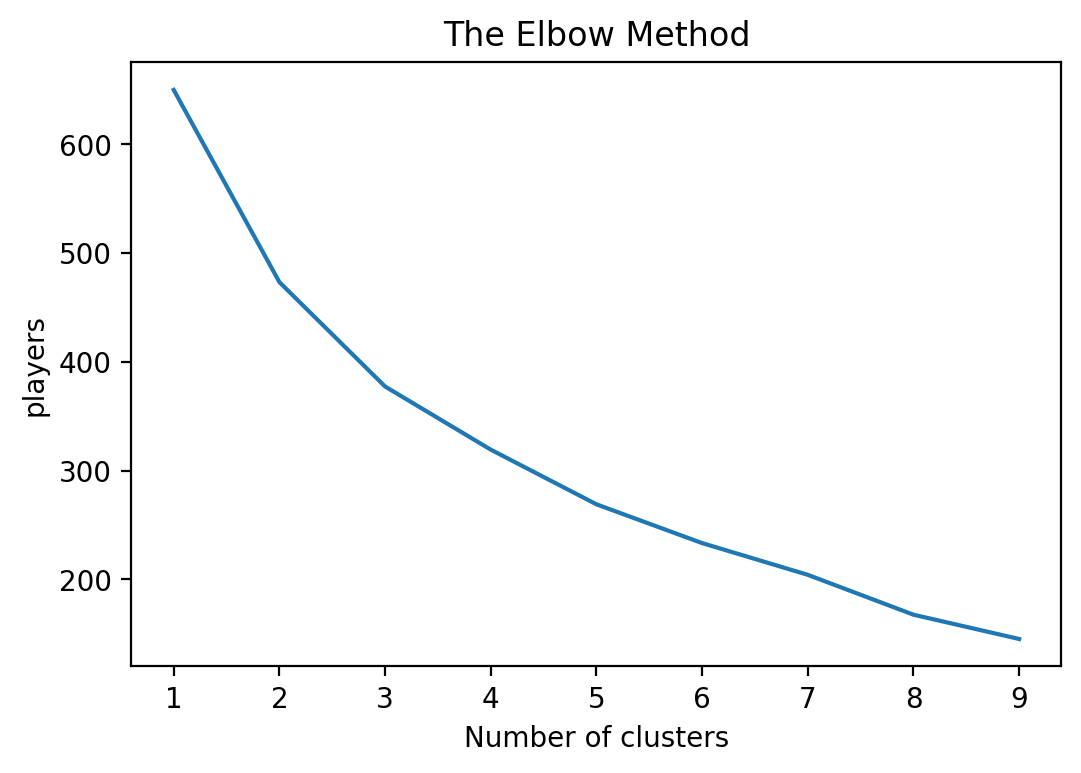

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1,
       0, 0, 1])

In [28]:
kmeans.cluster_centers_

array([[-0.44909781, -0.33047954, -0.32248521, -0.1883205 , -0.10429571,
         0.13193806, -0.16373186,  0.04955778, -0.29488391, -0.21946949,
        -0.16356794, -0.17852386, -0.27757379, -0.1465813 , -0.44909781,
        -0.52753204, -0.60680586, -0.40255533, -0.6113816 , -0.60212273,
        -0.24380185, -0.33291902, -0.20766517, -0.29488391, -0.20412415,
         0.13269938,  0.        ],
       [-0.11602556, -0.33360908,  0.87019231, -0.71053939, -0.80168159,
        -0.9082313 , -0.72161367, -0.4762681 , -0.29488391, -0.42268197,
         0.10081989, -0.69916776, -0.48792859,  0.40479343, -0.11602556,
         0.73153437,  1.02467438,  0.87439467,  0.990474  ,  0.99162317,
         0.65754373,  0.47360101,  0.60899711,  0.62662831,  0.43376381,
        -0.31940142,  0.        ],
       [ 1.691619  ,  1.74127668, -0.69230769,  2.03312041,  1.94232421,
         1.38766389,  1.97535587,  0.79147342,  1.54814054,  1.55863977,
         0.32995601,  1.97853805,  1.87797199, -0.3331

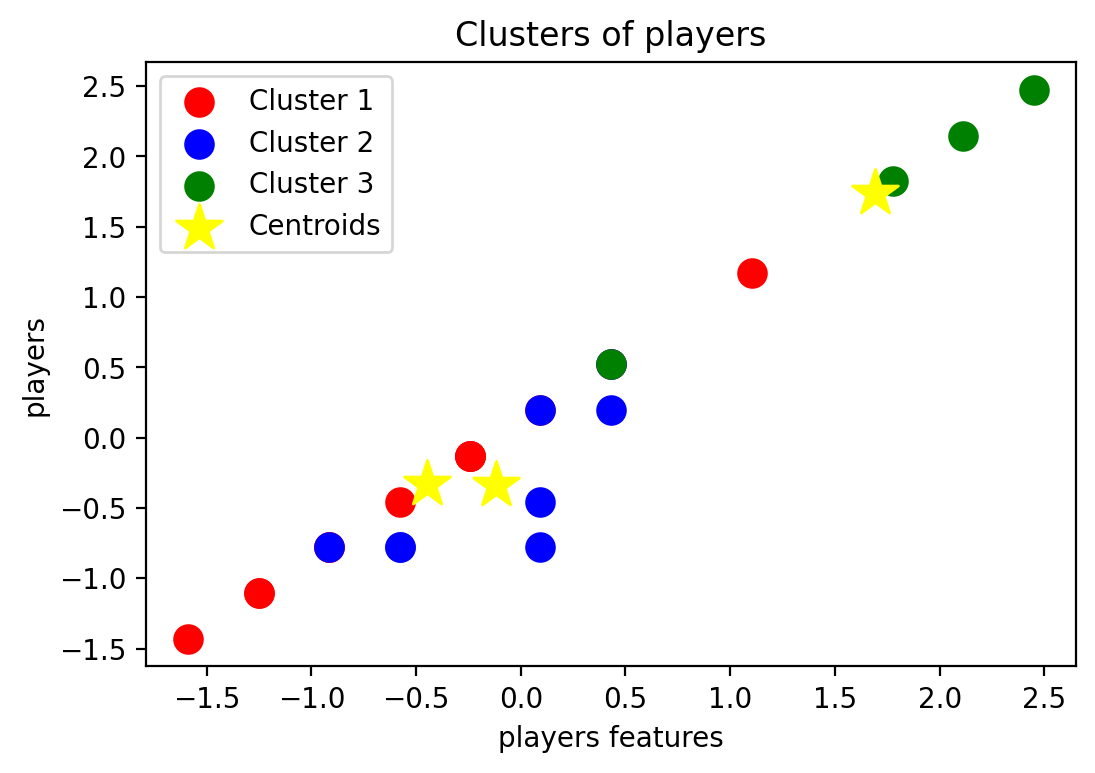

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
Australia_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,AC Agar (AUS),5,5,0,130,46,26.00,144,90.27,0,...,232,4,2/48,58.00,5.52,63.0,0,0,2,0
1,AT Carey (AUS),6,6,0,199,47,33.16,253,78.65,0,...,-,-,-,-,-,-,-,-,5,0
2,NM Coulter-Nile (AUS),1,1,0,34,34,34.00,31,109.67,0,...,26,1,1/26,26.00,8.66,18.0,0,0,0,0
3,PJ Cummins (AUS),6,6,2,38,12,9.50,67,56.71,0,...,266,8,4/24,33.25,4.75,42.0,1,0,0,0
4,AJ Finch (AUS),11,11,0,493,107,44.81,551,89.47,3,...,24,0,-,-,6.00,-,0,0,5,0
5,JR Hazlewood (AUS),6,4,4,16,10*,-,24,66.66,0,...,284,8,3/39,35.50,4.98,42.7,0,0,3,0
6,TM Head (AUS),12,12,0,339,96,28.25,364,93.13,0,...,70,0,-,-,7.11,-,0,0,2,0
7,CA Lynn (AUS),3,3,0,59,44,19.66,77,76.62,0,...,-,-,-,-,-,-,-,-,3,0
8,NM Lyon (AUS),2,2,1,4,3*,4.00,13,30.76,0,...,70,1,1/38,70.00,4.11,102.0,0,0,1,0
9,MR Marsh (AUS),5,5,0,186,55,37.20,218,85.32,0,...,81,3,2/24,27.00,4.50,36.0,0,0,2,0


In [31]:
Australia_2018["cluster"] = y_kmeans

In [32]:
Australia_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,AC Agar (AUS),5,5,0,130,46,26.00,144,90.27,0,...,4,2/48,58.00,5.52,63.0,0,0,2,0,0
1,AT Carey (AUS),6,6,0,199,47,33.16,253,78.65,0,...,-,-,-,-,-,-,-,5,0,0
2,NM Coulter-Nile (AUS),1,1,0,34,34,34.00,31,109.67,0,...,1,1/26,26.00,8.66,18.0,0,0,0,0,0
3,PJ Cummins (AUS),6,6,2,38,12,9.50,67,56.71,0,...,8,4/24,33.25,4.75,42.0,1,0,0,0,1
4,AJ Finch (AUS),11,11,0,493,107,44.81,551,89.47,3,...,0,-,-,6.00,-,0,0,5,0,2
5,JR Hazlewood (AUS),6,4,4,16,10*,-,24,66.66,0,...,8,3/39,35.50,4.98,42.7,0,0,3,0,1
6,TM Head (AUS),12,12,0,339,96,28.25,364,93.13,0,...,0,-,-,7.11,-,0,0,2,0,2
7,CA Lynn (AUS),3,3,0,59,44,19.66,77,76.62,0,...,-,-,-,-,-,-,-,3,0,0
8,NM Lyon (AUS),2,2,1,4,3*,4.00,13,30.76,0,...,1,1/38,70.00,4.11,102.0,0,0,1,0,0
9,MR Marsh (AUS),5,5,0,186,55,37.20,218,85.32,0,...,3,2/24,27.00,4.50,36.0,0,0,2,0,0


In [33]:
Australia_2018['cluster'].value_counts()

0    13
1     8
2     4
Name: cluster, dtype: int64

In [34]:
Australia_Cluster_2018 = np.array([13,8,4])

In [35]:
Australia_Cluster_2018

array([13,  8,  4])

In [36]:
%store Australia_Cluster_2018

Stored 'Australia_Cluster_2018' (ndarray)


In [37]:
Australia_2018_players_scaled.insert(0, 'Player', Australia_2018.Player)

In [38]:
Australia_2018_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,AC Agar (AUS),-0.242140,-0.130189,-0.692308,0.042976,0.177523,0.390619,0.019558,0.574488,-0.294884,...,0.710035,0.617128,0.153294,0.933610,0.355605,0.970741,-0.294884,-0.204124,-0.116736,0.0
1,AT Carey (AUS),0.094166,0.195283,-0.692308,0.540512,0.207308,0.888099,0.770199,0.073471,-0.294884,...,-0.604844,-0.975815,-0.804796,-0.796933,-1.505355,-0.784013,-0.294884,-0.204124,0.856061,0.0
2,NM Coulter-Nile (AUS),-1.587364,-1.432078,-0.692308,-0.649249,-0.179906,0.946463,-0.758629,1.410954,-0.294884,...,-0.604844,-0.797295,-0.565273,-0.021172,1.414195,-0.282655,-0.294884,-0.204124,-0.765266,0.0
3,PJ Cummins (AUS),0.094166,0.195283,1.230769,-0.620406,-0.835190,-0.755809,-0.510711,-0.872511,-0.294884,...,3.997233,0.850577,1.111384,0.195146,0.096015,0.385823,3.391165,-0.204124,-0.765266,0.0
4,AJ Finch (AUS),1.775695,1.822645,-0.692308,2.660449,1.994449,1.697547,2.822409,0.539995,3.391165,...,-0.604844,-0.811028,-0.804796,-0.796933,0.517428,-0.784013,-0.294884,-0.204124,0.856061,0.0
5,JR Hazlewood (AUS),0.094166,-0.455661,3.153846,-0.779041,-0.894762,-1.415873,-0.806835,-0.443499,-0.294884,...,1.367474,0.974167,1.111384,0.262279,0.173555,0.405320,-0.294884,-0.204124,0.207530,0.0
6,TM Head (AUS),2.112001,2.148117,-0.692308,1.550006,1.666807,0.546950,1.534613,0.697802,-0.294884,...,-0.604844,-0.495186,-0.804796,-0.796933,0.891643,-0.784013,-0.294884,-0.204124,-0.116736,0.0
7,CA Lynn (AUS),-0.914752,-0.781133,-0.692308,-0.468982,0.117951,-0.049887,-0.441845,-0.014056,-0.294884,...,-0.604844,-0.975815,-0.804796,-0.796933,-1.505355,-0.784013,-0.294884,-0.204124,0.207530,0.0
8,NM Lyon (AUS),-1.251058,-1.106606,0.269231,-0.865569,-1.103262,-1.137951,-0.882588,-1.991392,-0.294884,...,-0.604844,-0.495186,-0.565273,1.291654,-0.119749,2.057017,-0.294884,-0.204124,-0.441001,0.0
9,MR Marsh (AUS),-0.242140,-0.130189,-0.692308,0.446773,0.445594,1.168800,0.529167,0.361060,-0.294884,...,0.052595,-0.419658,-0.086228,0.008665,0.011732,0.218704,-0.294884,-0.204124,-0.116736,0.0


In [39]:
Australia_2018_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,AC Agar (AUS),0.390619,0.933610
1,AT Carey (AUS),0.888099,-0.796933
2,NM Coulter-Nile (AUS),0.946463,-0.021172
3,PJ Cummins (AUS),-0.755809,0.195146
4,AJ Finch (AUS),1.697547,-0.796933
5,JR Hazlewood (AUS),-1.415873,0.262279
6,TM Head (AUS),0.546950,-0.796933
7,CA Lynn (AUS),-0.049887,-0.796933
8,NM Lyon (AUS),-1.137951,1.291654
9,MR Marsh (AUS),1.168800,0.008665


In [40]:
Australia_2018_Ave=Australia_2018_players_scaled.mean()

In [41]:
Australia_2018_Ave

Mat_x           9.658940e-17
Inns_x         -9.769963e-17
NO              5.773160e-17
Runs_x         -7.549517e-17
HS              3.996803e-17
Ave_x           8.881784e-18
BF              6.661338e-17
SR_x            5.384582e-17
100            -5.329071e-17
50              1.332268e-17
0              -3.552714e-17
4s              8.881784e-18
6s              2.664535e-17
Unnamed: 0_y    0.000000e+00
Mat_y           9.658940e-17
Inns_y          1.110223e-16
Overs           0.000000e+00
Mdns            6.217249e-17
Runs_y         -8.881784e-18
Wkts            5.551115e-17
Ave_y          -8.881784e-17
Econ            2.353673e-16
SR_y           -7.105427e-17
4              -3.552714e-17
5              -2.886580e-17
Ct              6.605827e-17
St              0.000000e+00
dtype: float64

In [42]:
Australia_Ave_2018 =Australia_2018_Ave[['Ave_x','Ave_y']]

In [43]:
Australia_Ave_2018

Ave_x    8.881784e-18
Ave_y   -8.881784e-17
dtype: float64

In [44]:
Australia_Ave_2018 = np.array([Australia_Ave_2018.Ave_x, Australia_Ave_2018.Ave_y])

In [45]:
Australia_Ave_2018

array([ 8.8817842e-18, -8.8817842e-17])

In [46]:
%store Australia_Ave_2018

Stored 'Australia_Ave_2018' (ndarray)


In [47]:
Australia_2018

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,AC Agar (AUS),5,5,0,130,46,26.00,144,90.27,0,...,4,2/48,58.00,5.52,63.0,0,0,2,0,0
1,AT Carey (AUS),6,6,0,199,47,33.16,253,78.65,0,...,-,-,-,-,-,-,-,5,0,0
2,NM Coulter-Nile (AUS),1,1,0,34,34,34.00,31,109.67,0,...,1,1/26,26.00,8.66,18.0,0,0,0,0,0
3,PJ Cummins (AUS),6,6,2,38,12,9.50,67,56.71,0,...,8,4/24,33.25,4.75,42.0,1,0,0,0,1
4,AJ Finch (AUS),11,11,0,493,107,44.81,551,89.47,3,...,0,-,-,6.00,-,0,0,5,0,2
5,JR Hazlewood (AUS),6,4,4,16,10*,-,24,66.66,0,...,8,3/39,35.50,4.98,42.7,0,0,3,0,1
6,TM Head (AUS),12,12,0,339,96,28.25,364,93.13,0,...,0,-,-,7.11,-,0,0,2,0,2
7,CA Lynn (AUS),3,3,0,59,44,19.66,77,76.62,0,...,-,-,-,-,-,-,-,3,0,0
8,NM Lyon (AUS),2,2,1,4,3*,4.00,13,30.76,0,...,1,1/38,70.00,4.11,102.0,0,0,1,0,0
9,MR Marsh (AUS),5,5,0,186,55,37.20,218,85.32,0,...,3,2/24,27.00,4.50,36.0,0,0,2,0,0
